In [1]:
import pandas as pd
import torch
import torch.nn.functional as F
from torch.autograd import grad
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table('toy.txt', names=['X1', 'X2', 'y'])
df

,X1,X2,y
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-1.84,-1.13,0
...,...,...,...
95,0.71,2.27,1
96,1.96,0.83,1
97,2.52,1.83,1
98,2.77,2.82,1


In [3]:
# select features and target
X = df[['X1', 'X2']]
y = df['y']

# split the dataset into training and testing set (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)


# convert numpy arrays into tensors
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

In [4]:
cost = []
class Adaline(torch.nn.Module):
    def __init__(self, num_features):
        super(Adaline, self).__init__()
        self.num_features = num_features
        self.linear = torch.nn.Linear(num_features, 1)
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        netinput = self.linear(x)
        activation = netinput
        return activation.view(-1)
    
    def fit(self, x, y, num_epochs, learning_rate=0.01):
        
        # use stochastic gradient descent as the optimizer
        optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        
        for e in range(num_epochs):
            # compute output
            yhat = self.forward(x)
            
            # comput the loss
            loss = F.mse_loss(yhat, y)
            
            # reset gradients
            optimizer.zero_grad()
            
            # compute gradients
            loss.backward()
            
            # update weights
            optimizer.step()
            
            ### Logging ###
            yhat = self.forward(x)
            curr_loss = loss
            print('Epochs: %03d' %(e+1), end='')
            print('  | MSE: %.3f' % curr_loss)
            cost.append(curr_loss)
            
    def evaluate(self, x_test, y_test):
        netinput = self.forward(x_test)
        y_pred = torch.where(netinput > 0.5, 1, 0)
        print(f'Predictions: {y_pred}')
        print(f'Accuracy: {torch.sum(y_pred==y_test) / y_test.size(0)*100}%')

In [5]:
adaline = Adaline(num_features=X_train.size(1))

In [6]:
adaline.fit(X_train, y_train, num_epochs=40)

Epochs: 001  | MSE: 0.493
Epochs: 002  | MSE: 0.408
Epochs: 003  | MSE: 0.347
Epochs: 004  | MSE: 0.303
Epochs: 005  | MSE: 0.271
Epochs: 006  | MSE: 0.247
Epochs: 007  | MSE: 0.228
Epochs: 008  | MSE: 0.213
Epochs: 009  | MSE: 0.201
Epochs: 010  | MSE: 0.191
Epochs: 011  | MSE: 0.183
Epochs: 012  | MSE: 0.175
Epochs: 013  | MSE: 0.169
Epochs: 014  | MSE: 0.163
Epochs: 015  | MSE: 0.157
Epochs: 016  | MSE: 0.152
Epochs: 017  | MSE: 0.147
Epochs: 018  | MSE: 0.142
Epochs: 019  | MSE: 0.138
Epochs: 020  | MSE: 0.134
Epochs: 021  | MSE: 0.130
Epochs: 022  | MSE: 0.126
Epochs: 023  | MSE: 0.123
Epochs: 024  | MSE: 0.119
Epochs: 025  | MSE: 0.116
Epochs: 026  | MSE: 0.113
Epochs: 027  | MSE: 0.110
Epochs: 028  | MSE: 0.107
Epochs: 029  | MSE: 0.104
Epochs: 030  | MSE: 0.102
Epochs: 031  | MSE: 0.099
Epochs: 032  | MSE: 0.097
Epochs: 033  | MSE: 0.095
Epochs: 034  | MSE: 0.092
Epochs: 035  | MSE: 0.090
Epochs: 036  | MSE: 0.088
Epochs: 037  | MSE: 0.086
Epochs: 038  | MSE: 0.084
Epochs: 039 

In [7]:
adaline.evaluate(X_test, y_test)

Predictions: tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1])
Accuracy: 96.0%


ValueError: 'Blues' is not a valid value for color

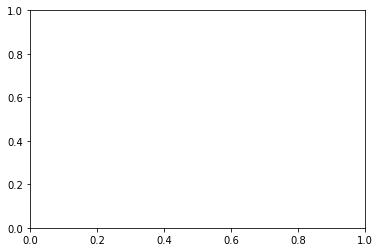

In [12]:
plt.plot(range(len(cost)), cost, figsize=(1))
plt.xlabel('Epoch')
plt.ylabel('Loss')